# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [2]:

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

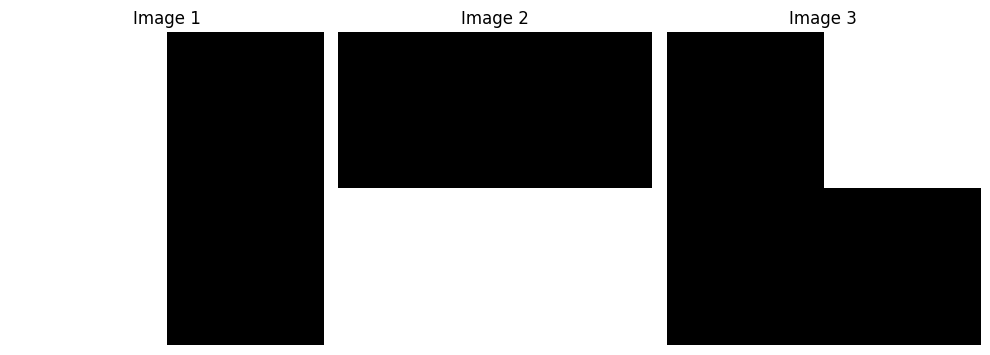

In [31]:
# solution

# Create blank 100x100 black images
img1 = np.zeros((100, 100), dtype=np.uint8)
img2 = np.zeros((100, 100), dtype=np.uint8)
img3 = np.zeros((100, 100), dtype=np.uint8)

# Modify the images to match the visualization
img1[:, 0:50] = 255   # White vertical bar in the center
img2[50:, :] = 255     # White bottom half
img3[:50, 50:] = 255   # White top-left quadrant

# Display images using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title("Image 1")
axes[0].axis("off")

axes[1].imshow(img2, cmap='gray')
axes[1].set_title("Image 2")
axes[1].axis("off")

axes[2].imshow(img3, cmap='gray')
axes[2].set_title("Image 3")
axes[2].axis("off")

plt.tight_layout()
plt.show()


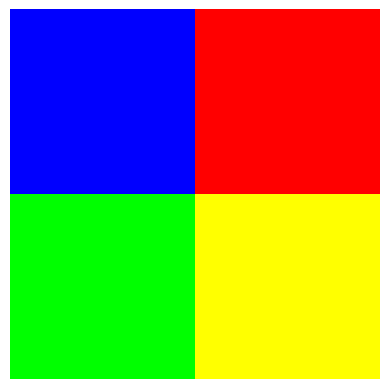

In [33]:
# solution



# Stack images into an RGB format
rgb_image = np.stack([img1, img2, img3], axis=-1)[:,::-1]

# Display the result
plt.imshow(rgb_image)
plt.axis("off")  # Hide axis
plt.show()

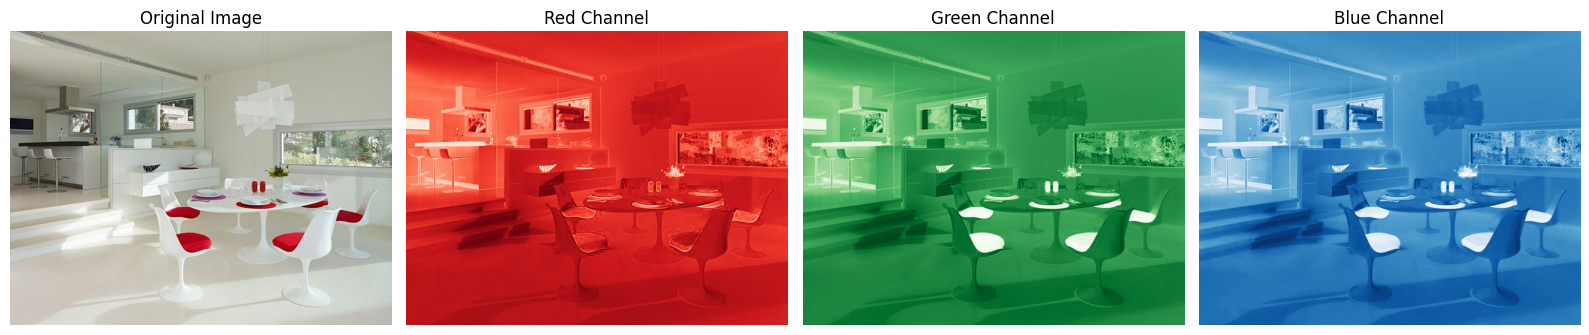

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read the image from the 'images' folder
image_path = "/content/sillas.jpg"
image = cv2.imread(image_path)

# Convert image from BGR to RGB (since OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract individual channels
red_channel = image[:, :, 0]  # Red channel
green_channel = image[:, :, 1]  # Green channel
blue_channel = image[:, :, 2]  # Blue channel

# Create a subplot with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Display the original image
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title("Original Image")

# Display the red channel
axes[1].imshow(red_channel, cmap='Reds')
axes[1].axis('off')
axes[1].set_title("Red Channel")

# Display the green channel
axes[2].imshow(green_channel, cmap='Greens')
axes[2].axis('off')
axes[2].set_title("Green Channel")

# Display the blue channel
axes[3].imshow(blue_channel, cmap='Blues')
axes[3].axis('off')
axes[3].set_title("Blue Channel")

# Show the plot
plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

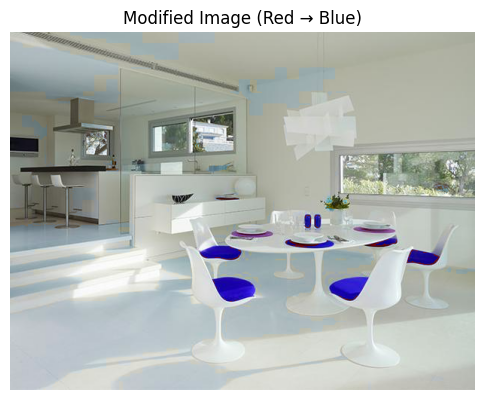

In [ ]:


# Create a mask where red is dominant
red_mask = (red_channel > 120) & (red_channel > green_channel) & (red_channel > blue_channel)

# Modify the image: swap red with blue
modified_image = image.copy()
modified_image[:, :, 0] = np.where(red_mask, blue_channel, red_channel)  # Swap red with blue
#modified_image[:, :, 2] = np.where(red_mask, red_channel, blue_channel)  # Swap blue with red

# Show the modified image
plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.axis("off")
plt.title("Modified Image (Red → Blue)")
plt.show()




In [ ]:
# solution

# Load images
model = cv2.imread("/content/model.png")
coat = cv2.imread("/content/coat.png")
texture = cv2.imread("/content/texture.png")  # Choose any texture from the folder

# Convert images to RGB (since OpenCV loads in BGR format)
model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)

# Resize coat and texture to match the model's body
coat = cv2.resize(coat, (model.shape[1], model.shape[0]))
texture = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

# Convert coat to grayscale to create a mask
gray_coat = cv2.cvtColor(coat, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray_coat, 50, 255, cv2.THRESH_BINARY)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Extract model's region without the coat
model_bg = cv2.bitwise_and(model, model, mask=mask_inv)

# Extract coat
coat_fg = cv2.bitwise_and(coat, coat, mask=mask)

# Combine model and coat
model_with_coat = cv2.add(model_bg, coat_fg)

# Apply texture to the coat
textured_coat = cv2.bitwise_and(texture, texture, mask=mask)
model_with_textured_coat = cv2.add(model_bg, textured_coat)

# Visualize the results
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(model)
axes[0].axis("off")
axes[0].set_title("Original Model")

axes[1].imshow(coat)
axes[1].axis("off")
axes[1].set_title("Coat")

axes[2].imshow(model_with_coat)
axes[2].axis("off")
axes[2].set_title("Model Wearing Coat")

axes[3].imshow(model_with_textured_coat)
axes[3].axis("off")
axes[3].set_title("Coat with New Texture")

plt.tight_layout()
plt.show()



NameError: name 'cv2' is not defined

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




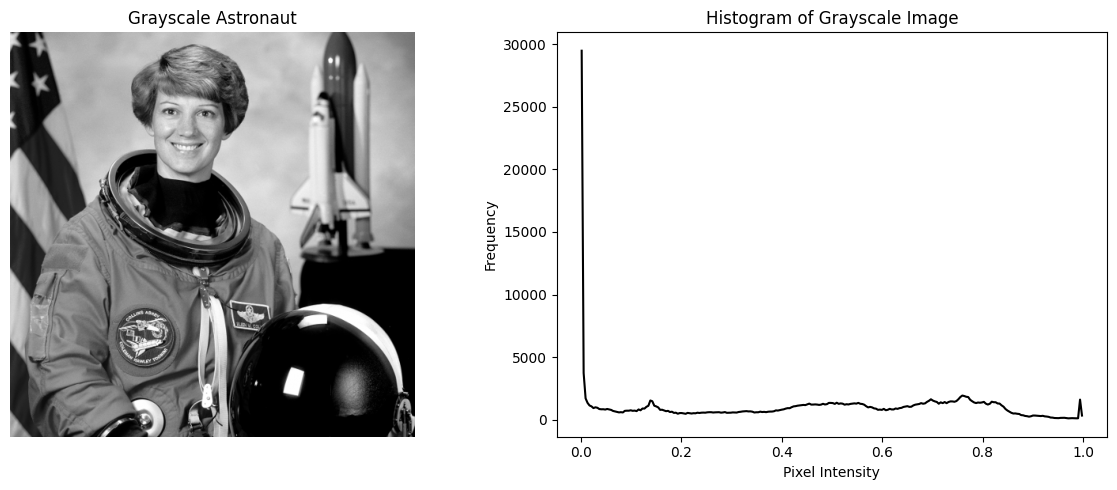

In [ ]:
# solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure

# Load the astronaut image from skimage's data module
astronaut = data.astronaut()

# Convert the image to grayscale
gray_astronaut = color.rgb2gray(astronaut)

# Compute the histogram of the grayscale image
hist, bins = exposure.histogram(gray_astronaut)

# Plot the grayscale image and its histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Show the grayscale image
axes[0].imshow(gray_astronaut, cmap="gray")
axes[0].axis("off")
axes[0].set_title("Grayscale Astronaut")

# Plot the histogram
axes[1].plot(bins, hist, color='black')
axes[1].set_title("Histogram of Grayscale Image")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

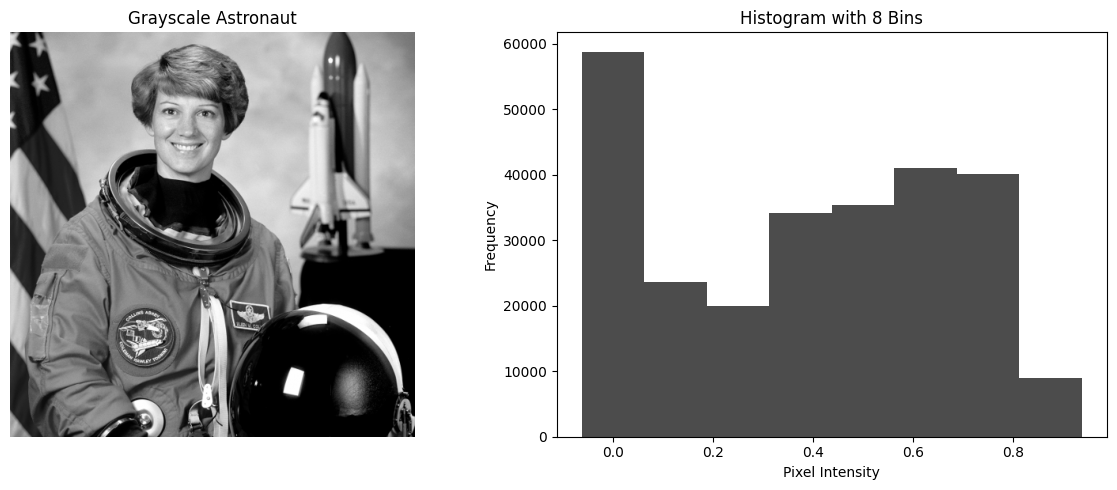

In [ ]:
# solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

# Load the astronaut image from skimage's data module
astronaut = data.astronaut()

# Convert the image to grayscale
gray_astronaut = color.rgb2gray(astronaut)

# Compute the histogram with 8 bins
hist, bins = np.histogram(gray_astronaut, bins=8, range=(0, 1))

# Plot the grayscale image and the histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Show the grayscale image
axes[0].imshow(gray_astronaut, cmap="gray")
axes[0].axis("off")
axes[0].set_title("Grayscale Astronaut")

# Plot the histogram
axes[1].bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black', alpha=0.7)
axes[1].set_title("Histogram with 8 Bins")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

A higher number of bins results in a more detailed distribution.

A lower number of bins results in a more general distribution.

Yes, my conclusion changes based on the number of bins because it affects how I interpret the image intensity distribution.

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


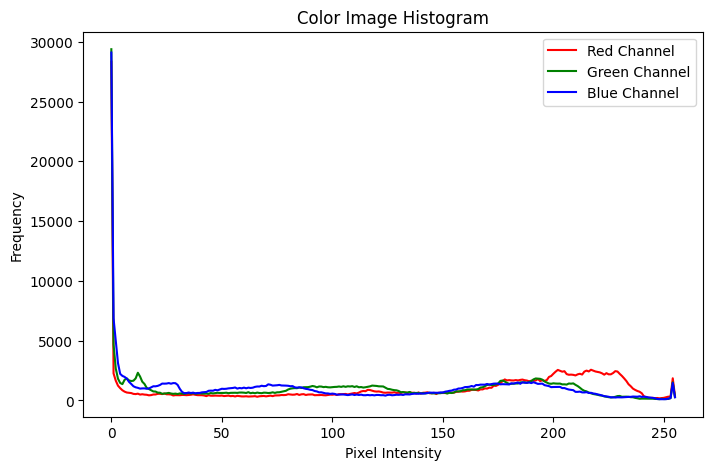

In [ ]:
#solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure

# Load the astronaut image
astronaut = data.astronaut()

# Compute histograms for each color channel
r_hist, r_bins = exposure.histogram(astronaut[:, :, 0])
g_hist, g_bins = exposure.histogram(astronaut[:, :, 1])
b_hist, b_bins = exposure.histogram(astronaut[:, :, 2])

# Plot the histograms
plt.figure(figsize=(8, 5))

# Plot individual histograms with different colors
plt.plot(r_bins, r_hist, color="red", label="Red Channel")
plt.plot(g_bins, g_hist, color="green", label="Green Channel")
plt.plot(b_bins, b_hist, color="blue", label="Blue Channel")

# Add labels and title
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Color Image Histogram")
plt.legend()  # Show legend for each channel

plt.show()



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



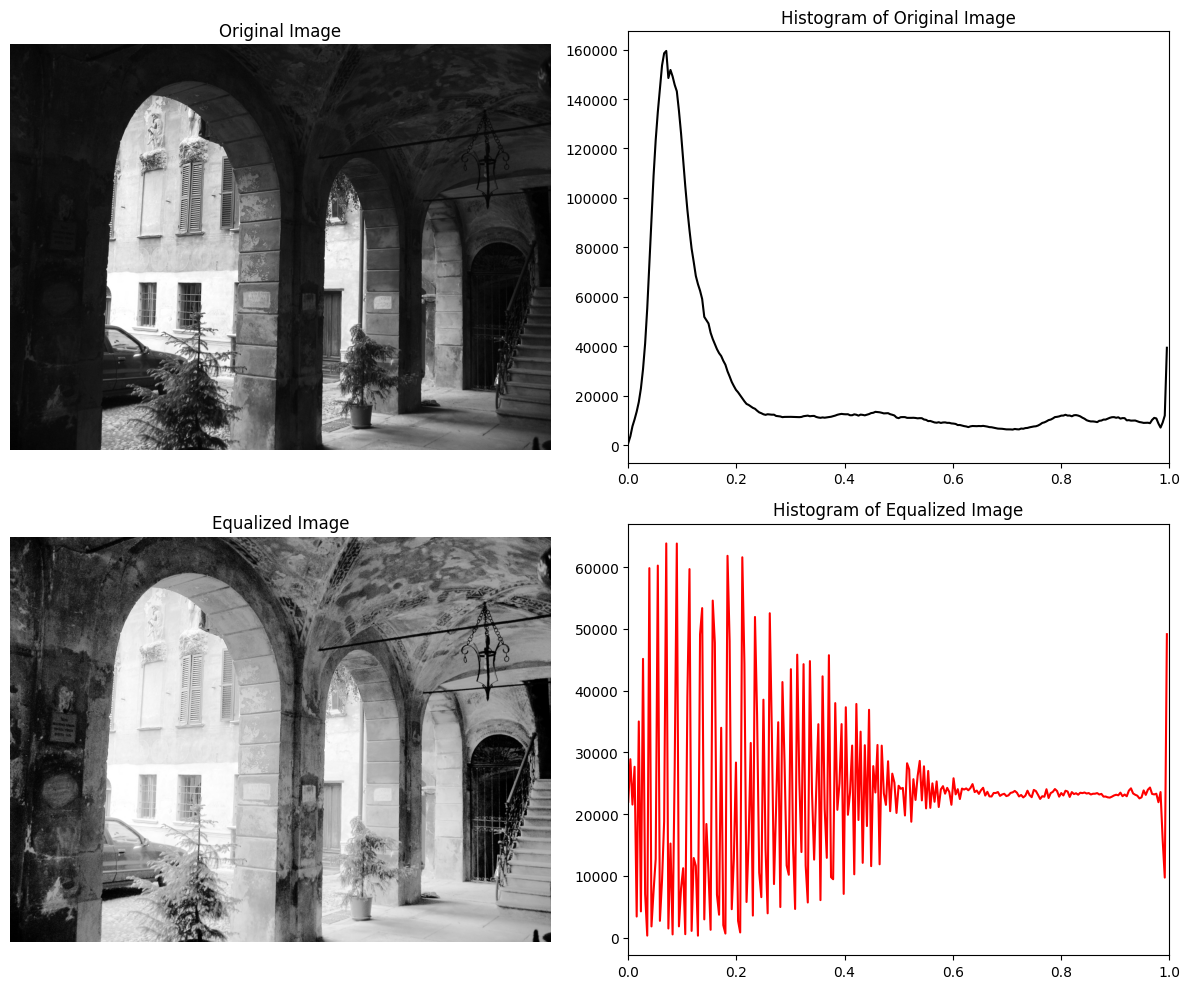

In [ ]:
# solution

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color

# Load the image (grayscale conversion if needed)
image_path = "/content/aquatermi_lowcontrast.jpg"
image = io.imread(image_path, as_gray=True)  # Read as grayscale

# Compute Histogram of the original image
hist_orig, bins_orig = np.histogram(image.flatten(), bins=256, range=[0,1])

# Perform histogram equalization
equalized_image = exposure.equalize_hist(image)

# Compute Histogram of the equalized image
hist_eq, bins_eq = np.histogram(equalized_image.flatten(), bins=256, range=[0,1])

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Display histogram of original image
axes[0, 1].plot(bins_orig[:-1], hist_orig, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlim([0, 1])

# Display equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

# Display histogram of equalized image
axes[1, 1].plot(bins_eq[:-1], hist_eq, color='red')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

The histogram equation is nonlinear and redistributes the densities based on their probability distribution.

The linear variation extension is linear and simply scales the pixel values ​​to the full dynamic range.


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [ ]:
# solution

# solution
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def linear_contrast_stretch(image, bins=256):
    """
    Applies linear contrast stretching to a grayscale image.

    Parameters:
        image (numpy.ndarray): Grayscale image array.
        bins (int): Number of bins for histogram computation.

    Returns:
        numpy.ndarray: Contrast-enhanced image.
    """
    I_min = np.min(image)  # Minimum intensity
    I_max = np.max(image)  # Maximum intensity

    # Apply the contrast stretching formula
    stretched_image = (image - I_min) / (I_max - I_min)

    # Clip values to ensure they remain in the range [0,1]
    stretched_image = np.clip(stretched_image, 0, 1)

    return stretched_image

# Load the grayscale image
image_path = "/content/aquatermi_lowcontrast.jpg"
image = io.imread(image_path, as_gray=True)  # Read as grayscale

# Compute histogram of original image
hist_orig, bins_orig = np.histogram(image.flatten(), bins=256, range=[0,1])

# Apply Linear Contrast Stretching
stretched_image = linear_contrast_stretch(image)

# Compute histogram of stretched image
hist_stretched, bins_stretched = np.histogram(stretched_image.flatten(), bins=256, range=[0,1])

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Display histogram of original image
axes[0, 1].plot(bins_orig[:-1], hist_orig, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlim([0, 1])

# Display contrast-stretched image
axes[1, 0].imshow(stretched_image, cmap='gray')
axes[1, 0].set_title("Contrast-Stretched Image")
axes[1, 0].axis("off")

# Display histogram of stretched image
axes[1, 1].plot(bins_stretched[:-1], hist_stretched, color='red')
axes[1, 1].set_title("Histogram of Stretched Image")
axes[1, 1].set_xlim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




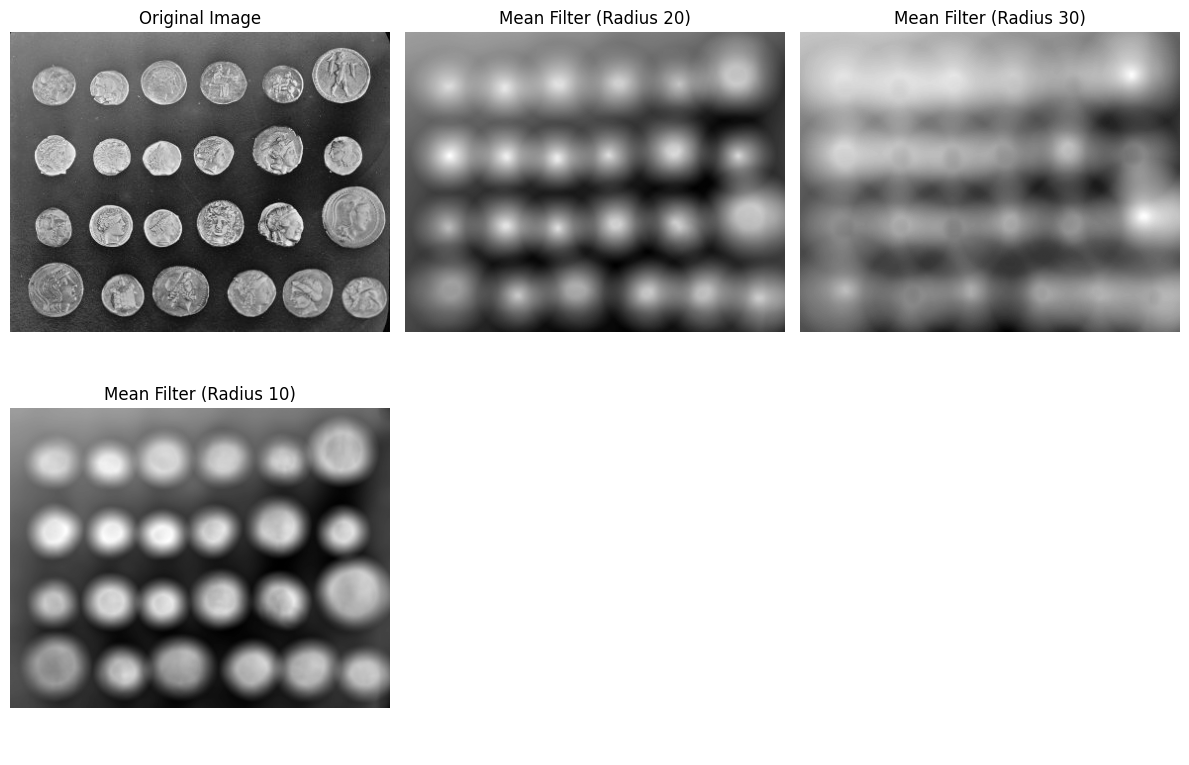

In [ ]:
from skimage import data, filters, morphology
import matplotlib.pyplot as plt

# Load the coins image
coins = data.coins()

# Define structuring elements (selem) with different radii
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)
selem_10 = morphology.disk(10)

# Apply the mean filter with radius 20
mean_filtered_20 = filters.rank.mean(coins, selem_20)

# Apply the mean filter with radius 30
mean_filtered_30 = filters.rank.mean(coins, selem_30)

# Apply the mean filter with radius 10
mean_filtered_10 = filters.rank.mean(coins, selem_10)

# Visualize all images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original image
axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Filtered images with different selem radii
axes[0, 1].imshow(mean_filtered_20, cmap='gray')
axes[0, 1].set_title("Mean Filter (Radius 20)")
axes[0, 1].axis('off')

axes[0, 2].imshow(mean_filtered_30, cmap='gray')
axes[0, 2].set_title("Mean Filter (Radius 30)")
axes[0, 2].axis('off')

axes[1, 0].imshow(mean_filtered_10, cmap='gray')
axes[1, 0].set_title("Mean Filter (Radius 10)")
axes[1, 0].axis('off')

# Empty plot for spacing
axes[1, 1].axis('off')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-24-90b9ae017e3a>:9: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = morphology.square(20)
<ipython-input-24-90b9ae017e3a>:10: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = morphology.rectangle(20, 40)


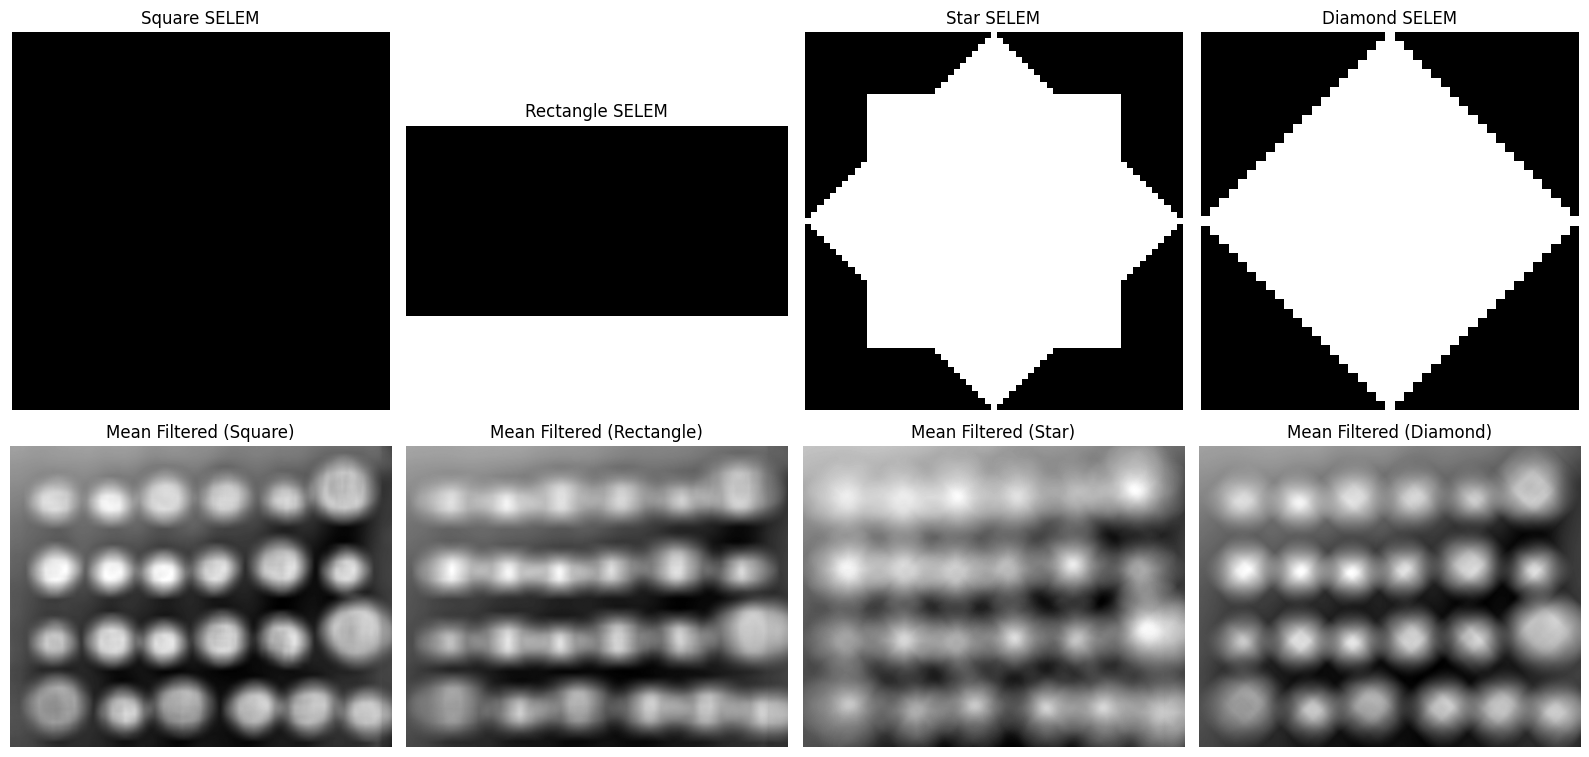

In [ ]:
# solution
from skimage import data, filters, morphology
import matplotlib.pyplot as plt

# Load the coins image
coins = data.coins()

# Define the different structuring elements
selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(20, 40)
selem_star = morphology.star(20)
selem_diamond = morphology.diamond(20)

# Apply the mean filter with different structuring elements
mean_filtered_square = filters.rank.mean(coins, selem_square)
mean_filtered_rectangle = filters.rank.mean(coins, selem_rectangle)
mean_filtered_star = filters.rank.mean(coins, selem_star)
mean_filtered_diamond = filters.rank.mean(coins, selem_diamond)

# Create a 2 x n subplot (2 rows for selem and smoothened images)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Display the structuring elements and corresponding smoothened images
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title("Square SELEM")
axes[0, 0].axis('off')
axes[1, 0].imshow(mean_filtered_square, cmap='gray')
axes[1, 0].set_title("Mean Filtered (Square)")
axes[1, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title("Rectangle SELEM")
axes[0, 1].axis('off')
axes[1, 1].imshow(mean_filtered_rectangle, cmap='gray')
axes[1, 1].set_title("Mean Filtered (Rectangle)")
axes[1, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title("Star SELEM")
axes[0, 2].axis('off')
axes[1, 2].imshow(mean_filtered_star, cmap='gray')
axes[1, 2].set_title("Mean Filtered (Star)")
axes[1, 2].axis('off')

axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title("Diamond SELEM")
axes[0, 3].axis('off')
axes[1, 3].imshow(mean_filtered_diamond, cmap='gray')
axes[1, 3].set_title("Mean Filtered (Diamond)")
axes[1, 3].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()




*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Small Radius: Light smoothing, while preserving more detail.

Large Radius: Stronger smoothing, greater noise reduction, but with more detail and edges lost.



*   What is the observed behaviour with difference in the structuring element?



**Solution**

The shape of the structuring element affects the direction and smoothness of the filter.

Disc elements are great for general smoothing, while rectangles and squares provide directional effects.

Stars and diamonds provide more balanced but irregular smoothing.





*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*Median filter: Simple and fast, used to remove background noise, but not ideal for preserving edges.

Gaussian filter: Better for preserving edges and producing natural blur, ideal for noise reduction, smoothing, and as a pre-processing step for edge detection tasks.